#### Statistical test for 25 samples (local tests + area test):

We use paired t-test to test the hypothesis that whether the average local errors and the graph similarity levels are from the same distribution in the polygon edge pairs between:

    1) vein graph and hydathodes; 
    2) vein graph and reference point sets.

In [1]:
from scipy.stats import ttest_rel
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

In [2]:
area_df = pd.read_csv('test_results/summary_area_each.csv', index_col = 0)
local = pd.read_csv('test_results/summary_local_each.csv', index_col = 0)
local_df = pd.read_csv('test_results/summary_local_comparison.csv', index_col = 0)

In [3]:
local_df

,dot_angle,dot_dist,centroid_angle,centroid_dist,midpoint_angle,midpoint_dist,random_angle,random_dist
Pilea,7.982859,0.259347,9.129036,0.358156,11.485808,0.462831,21.873135,0.762970
Pilea1,10.218056,0.317254,11.590145,0.344963,12.978704,0.380528,23.480629,0.773098
Pilea2,9.772088,0.266168,9.895719,0.358859,12.877475,0.450328,21.641746,0.741440
Pilea3,8.810447,0.327785,9.435312,0.359798,10.848961,0.441809,22.213167,0.735332
PileaALeaf0,9.960976,0.278841,10.934213,0.335389,12.650583,0.404812,20.919134,0.846845
PileaALeaf1,8.965404,0.298707,9.512235,0.373754,12.094239,0.429346,22.670329,0.860381
PileaALeaf2,8.562789,0.304502,10.499952,0.370483,12.475686,0.446870,23.555795,0.808676
PileaALeaf4,9.286415,0.313061,10.335706,0.347747,12.964022,0.408250,22.665444,0.809318
PileaALeaf5,8.780020,0.286820,11.275043,0.340373,13.098263,0.438940,24.211371,0.813124
PileaALeaf6,8.124091,0.264683,9.382014,0.344187,12.979174,0.414381,21.652769,0.779502


In [4]:
_, p1 = ttest_rel(local_df['dot_angle'], local_df['centroid_angle'])
_, p2 = ttest_rel(local_df['dot_angle'], local_df['midpoint_angle'])
_, p3 = ttest_rel(local_df['dot_angle'], local_df['random_angle'])

In [5]:
p1, p2, p3

(6.253624874757574e-09, 7.564734381103157e-14, 2.955914034104939e-23)

In [6]:
_, p1 = ttest_rel(local_df['dot_dist'], local_df['centroid_dist'])
_, p2 = ttest_rel(local_df['dot_dist'], local_df['midpoint_dist'])
_, p3 = ttest_rel(local_df['dot_dist'], local_df['random_dist'])

In [7]:
p1, p2, p3

(8.803245081784134e-09, 8.591490478914676e-14, 1.9380561390031176e-25)

In [8]:
area_df.describe()

,dot,centorid,midpoint,random
count,25.000000,25.000000,25.000000,25.000000
mean,0.707470,0.695837,0.649116,0.463546
std,0.015868,0.016528,0.014310,0.020955
min,0.679040,0.655709,0.614772,0.416887
25%,0.694566,0.685586,0.641999,0.450247
50%,0.709399,0.693361,0.647842,0.468603
75%,0.715890,0.707000,0.659619,0.478536
max,0.740266,0.727130,0.671459,0.492888


In [9]:
_, p1 = ttest_rel(area_df['dot'], area_df['centorid'])
_, p2 = ttest_rel(area_df['dot'], area_df['midpoint'])
_, p3 = ttest_rel(area_df['dot'], area_df['random'])

In [10]:
p1, p2, p3

(0.007990580030231993, 1.2941232341917521e-12, 2.548281842341572e-24)

In [11]:
local.describe()

,num_face,num_pairs,angle_err_mean,angle_err_std,dist_err_mean,dist_err_std
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,94.640000,129.800000,8.941862,7.749001,0.278583,0.221591
std,27.138349,43.690197,0.839317,1.126338,0.031994,0.029632
min,43.000000,71.000000,6.952457,5.294792,0.198243,0.150070
25%,74.000000,91.000000,8.530772,7.043601,0.259347,0.211178
50%,99.000000,127.000000,8.810447,7.432953,0.278841,0.227531
75%,118.000000,164.000000,9.612570,8.570915,0.299396,0.231750
max,133.000000,210.000000,10.275922,9.803922,0.334466,0.278060


Example using `seaborn` to plot for the bars representing statistical significance:

In [12]:
area_df.columns = ['hydathode', 'centorid', 'midpoint', 'random']

In [13]:
area_df_melt = area_df.melt(value_vars = ['hydathode', 'centorid', 'midpoint', 'random'],  var_name='node_type', value_name='J_index')

In [14]:
area_df_melt['node_type'] = area_df_melt['node_type'].astype('category')
area_df_melt['J_index'] = area_df_melt['J_index'].astype('float64')


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

hydathode v.s. centorid: t-test paired samples with Bonferroni correction, P_val=2.397e-02 stat=2.893e+00
hydathode v.s. midpoint: t-test paired samples with Bonferroni correction, P_val=3.882e-12 stat=1.337e+01
hydathode v.s. random: t-test paired samples with Bonferroni correction, P_val=7.645e-24 stat=4.340e+01


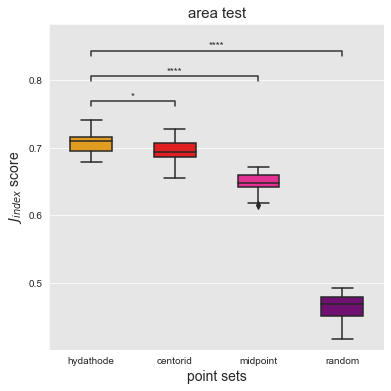

In [18]:
colors = ['orange','red', 'deeppink', 'purple']
x = 'node_type'
y = 'J_index'
order = ['hydathode', 'centorid', 'midpoint', 'random']
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(figsize = (6,6))
ax = sns.boxplot (x = x, y = y, data = area_df_melt, order = order, width = .5)


ax, test_results = add_stat_annotation(ax, data = area_df_melt, x=x, y=y, order = order,
                    box_pairs = [('hydathode', 'random'), ('hydathode', 'midpoint'), ('hydathode', 'centorid')],
                    test='t-test_paired',  
                    text_format='star', 
                    loc='inside', 
                    verbose=2)
ax.set_title('area test', fontsize = 15)
ax.set_xlabel('point sets', fontsize = 14)
ax.set_ylabel('$J_{index}$ score', fontsize = 14)
plt.show()
fig.savefig('area_test_results.pdf', dpi=300, bbox_inches='tight')


In [20]:
local_dist_df = local_df[['dot_dist', 'centroid_dist', 'midpoint_dist', 'random_dist']]
local_dist_df.columns = ['hydathode', 'centorid', 'midpoint', 'random']

In [21]:
local_angle_df = local_df[['dot_angle', 'centroid_angle', 'midpoint_angle', 'random_angle']]
local_angle_df.columns = ['hydathode', 'centorid', 'midpoint', 'random']

In [22]:
local_dist_melt = local_dist_df.melt(value_vars = ['hydathode', 'centorid', 'midpoint', 'random'],  var_name='node_type', value_name='dist_error')
local_angle_melt = local_angle_df.melt(value_vars = ['hydathode', 'centorid', 'midpoint', 'random'],  var_name='node_type', value_name='angle_error')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

hydathode v.s. centorid: t-test paired samples with Bonferroni correction, P_val=2.641e-08 stat=-8.587e+00
hydathode v.s. midpoint: t-test paired samples with Bonferroni correction, P_val=2.577e-13 stat=-1.516e+01
hydathode v.s. random: t-test paired samples with Bonferroni correction, P_val=5.814e-25 stat=-4.838e+01


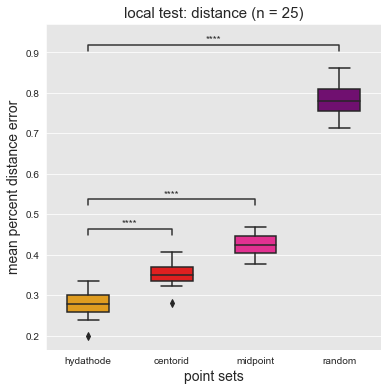

In [23]:
x = 'node_type'
y = 'dist_error'

fig, ax = plt.subplots(figsize = (6,6))
ax = sns.boxplot (x = x, y = y, data = local_dist_melt, order = order, width = .5)

ax, test_results = add_stat_annotation(ax, data = local_dist_melt, x=x, y=y, order = order,
                    box_pairs = [('hydathode', 'random'), ('hydathode', 'midpoint'), ('hydathode', 'centorid')],
                    test='t-test_paired',  
                    text_format='star', 
                    loc='inside', 
                    verbose=2)
ax.set_title('local test: distance (n = 25)', fontsize = 15)
ax.set_xlabel('point sets', fontsize = 14)
ax.set_ylabel('mean percent distance error', fontsize = 14)
plt.show()
fig.savefig('distance_error.pdf', dpi=300, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

hydathode v.s. centorid: t-test paired samples with Bonferroni correction, P_val=1.876e-08 stat=-8.748e+00
hydathode v.s. midpoint: t-test paired samples with Bonferroni correction, P_val=2.269e-13 stat=-1.525e+01
hydathode v.s. random: t-test paired samples with Bonferroni correction, P_val=8.868e-23 stat=-3.913e+01


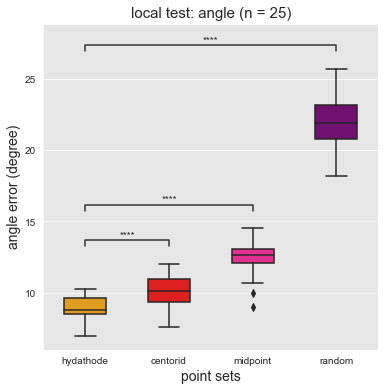

In [24]:
x = 'node_type'
y = 'angle_error'

fig, ax = plt.subplots(figsize = (6,6))
ax = sns.boxplot (x = x, y = y, data = local_angle_melt, order = order, width = .5)

ax, test_results = add_stat_annotation(ax, data = local_angle_melt, x=x, y=y, order = order,
                    box_pairs = [('hydathode', 'random'), ('hydathode', 'midpoint'), ('hydathode', 'centorid')],
                    test='t-test_paired',  
                    text_format='star', 
                    loc='inside', 
                    verbose=2)
ax.set_title('local test: angle (n = 25)', fontsize = 15)
ax.set_xlabel('point sets', fontsize = 14)
ax.set_ylabel('angle error (degree)', fontsize = 14)
plt.show()
fig.savefig('mean angle_error.pdf', dpi=300, bbox_inches='tight')